#### Multiple linear regression for "Rating", using `[['owned', 'yearpublished', 'maxplayers', 'minage']]`

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm #needed for Cooks distance


# Load the data
ratings_data = pd.read_csv('./ratings.csv')
details_data = pd.read_csv('./details.csv')

# Rename columns in the ratings data for clarity
ratings_data_renamed = ratings_data.rename(columns={
    'rank': 'rating_rank',
    'average': 'rating_average',
    'bayes_average': 'rating_bayes_average',
    'users_rated': 'rating_users_rated'
})

# Merge the datasets on 'id' and 'num'
combined_data = pd.merge(ratings_data_renamed, details_data, on=['id'], suffixes=('_rating', '_details'))

# Drop unnecessary columns
columns_to_drop = ['url', 'thumbnail', 'description', 'boardgamepublisher', 'boardgamedesigner', 'boardgameartist']
cleaned_data = combined_data.drop(columns=columns_to_drop)

# Convert categorical data to numeric format using one-hot encoding
# cleaned_data = pd.get_dummies(cleaned_data, columns=['boardgamecategory', 'boardgamemechanic', 'boardgamefamily', 'boardgameexpansion', 'boardgameimplementation'])
# cleaned_data = cleaned_data.drop(['boardgamecategory', 'boardgamemechanic', 'boardgamefamily', 'boardgameexpansion', 'boardgameimplementation'], axis=1)

# Check for duplicates and drop them
cleaned_data = cleaned_data.drop_duplicates()


cat = cleaned_data.select_dtypes(include=['object'])
#drop categorical because encoding and scaling is troublesome for regression. 
cleaned_data_num = cleaned_data.drop(columns=cat.columns)

# Prepare data for modeling
X = cleaned_data_num[['owned', 'yearpublished', 'minplayers', 'minage']]
y = cleaned_data_num['rating_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
cleaned_data_num.describe()

,num_rating,id,year,rating_rank,rating_average,rating_bayes_average,rating_users_rated,num_details,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,owned,trading,wanting,wishing
count,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000
mean,10878.522352,118133.093847,1988.101290,10879.522352,6.417249,5.683664,874.548518,10815.000000,1986.094910,2.007027,5.709491,90.509177,63.647774,90.509177,9.611391,1487.924553,43.585965,42.030373,233.655587
std,6311.917913,105310.419253,190.115056,6311.917913,0.929345,0.366096,3695.946026,6244.476172,210.042496,0.688957,15.102385,534.826511,447.213702,534.826511,3.640562,5395.077773,102.410851,117.940355,800.657809
min,0.000000,1.000000,0.000000,1.000000,1.040000,0.000000,30.000000,0.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5407.500000,12280.500000,2001.000000,5408.500000,5.830000,5.510000,57.000000,5407.500000,2001.000000,2.000000,4.000000,25.000000,20.000000,25.000000,8.000000,150.000000,5.000000,3.000000,14.000000
50%,10838.000000,105187.000000,2011.000000,10839.000000,6.450000,5.546000,124.000000,10815.000000,2011.000000,2.000000,4.000000,45.000000,30.000000,45.000000,10.000000,322.000000,13.000000,9.000000,39.000000
75%,16355.500000,207013.000000,2017.000000,16356.500000,7.040000,5.678000,397.000000,16222.500000,2017.000000,2.000000,6.000000,90.000000,60.000000,90.000000,12.000000,903.500000,38.000000,29.000000,131.000000
max,21830.000000,350992.000000,3500.000000,21831.000000,9.570000,8.511000,108975.000000,21630.000000,2023.000000,10.000000,999.000000,60000.000000,60000.000000,60000.000000,25.000000,168364.000000,2508.000000,2011.000000,19325.000000


In [3]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [5]:
# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² score on training data: {r2_train}")
print(f"R² score on test data: {r2_test}")
print(f"Mean Absolute Error on training data: {mae_train}")
print(f"Mean Absolute Error on test data: {mae_test}")
print(f"Mean Squared Error on training data: {mse_train}")
print(f"Mean Squared Error on test data: {mse_test}")


R² score on training data: 0.07037842336562505
R² score on test data: 0.0597282390881817
Mean Absolute Error on training data: 0.6898139625263473
Mean Absolute Error on test data: 0.702403673666696
Mean Squared Error on training data: 0.8004511925602443
Mean Squared Error on test data: 0.8206900921362078


In [6]:
# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
               Coefficient
owned             0.152216
yearpublished     0.054841
maxplayers       -0.042935
minage            0.164210


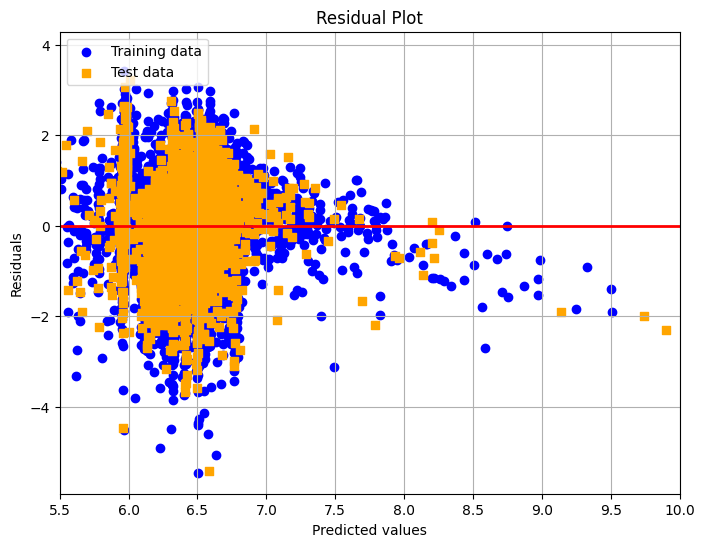

In [7]:

# Plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred_test, residuals_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_pred_train.min(), y_pred_test.min()), xmax=max(y_pred_train.max(), y_pred_test.max()), color='red', lw=2)
plt.title('Residual Plot')
plt.grid(True)
plt.xlim(5.5, 10)
plt.show()



## Fails Homoscedasticity, just too much variation in actual Ratings around the 6.3 mark. 
We need to focus our attention on a subset...

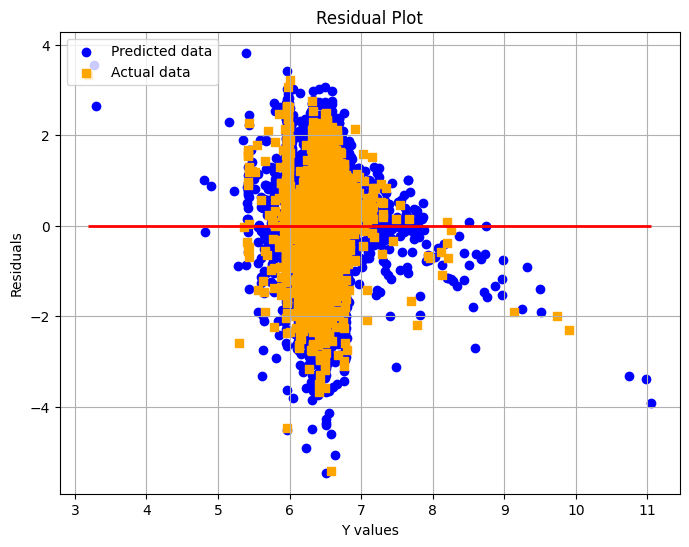

In [8]:

# Plot residuals
residuals_ = y_train - y_pred_train
residuals_actual = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', label='Predicted data')
plt.scatter(y_pred_test, residuals_test, c='orange', marker='s', label='Actual data')
plt.xlabel('Y values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_pred_train.min(), y_pred_test.min()), xmax=max(y_pred_train.max(), y_pred_test.max()), color='red', lw=2)
plt.title('Residual Plot')
plt.grid(True)
plt.show()


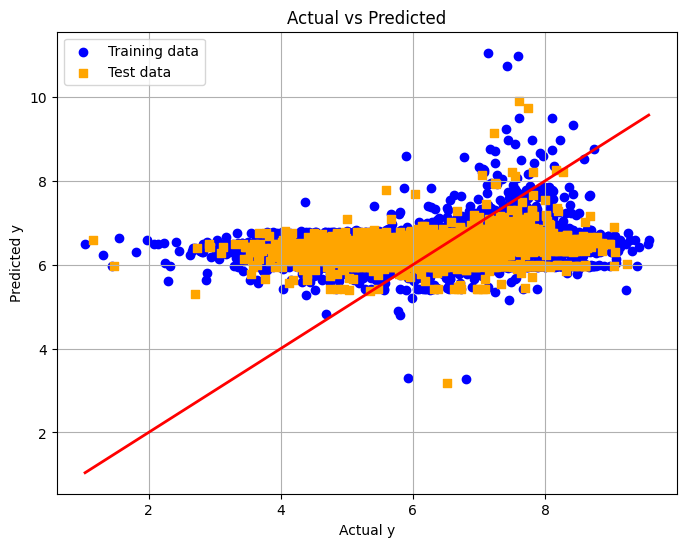

In [9]:

# Plot predicted vs actual y
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_pred_test, c='orange', marker='s', label='Test data')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='red', lw=2)
plt.legend(loc='upper left')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [10]:
cleaned_data_num

,num_rating,id,year,rating_rank,rating_average,rating_bayes_average,rating_users_rated,num_details,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,owned,trading,wanting,wishing
0,105,30549,2008,106,7.59,7.487,108975,0,2008,2,4,45,45,45,8,168364,2508,625,9344
1,189,822,2000,190,7.42,7.309,108738,1,2000,2,5,45,30,45,7,161299,1716,582,7383
2,428,13,1995,429,7.14,6.970,108024,2,1995,3,4,120,60,120,10,167733,2018,485,5890
3,72,68448,2010,73,7.74,7.634,89982,3,2010,2,7,30,30,30,10,120466,1567,1010,12105
4,103,36218,2008,104,7.61,7.499,81561,4,2008,2,4,30,30,30,13,106956,2009,655,8621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,12748,296892,2020,12749,7.37,5.531,30,21626,2020,3,9,30,20,30,8,112,8,4,32
21627,15016,217378,2016,15017,6.61,5.517,30,21627,2016,1,5,30,15,30,10,64,1,6,21
21628,19459,18063,1970,19460,5.00,5.488,30,21628,1970,2,4,60,60,60,10,98,7,4,5
21629,17256,10052,1989,17257,5.80,5.505,30,21629,1989,2,4,10,10,10,5,52,4,8,13


Filter on recent games after 1945. Reasons for it in EDA. 

In [ ]:
#we will focus our analysis on games published after 1945. 
cleaned_data_num = cleaned_data_num[cleaned_data_num['yearpublished'] >= 1945]

### filter on games with more than ``250 ratings``

### A lot of data is lost this way, focusing our attention on 1/3rd of the data... But what we lose is noisy data with a lot of variability, which would make our model too broad and unhelpful. If you can make it to 250 ratings, this model's predictions can help.

### There are risks involved, but this can allow us to see what the moderately to highly popular games have in common. There are many reasons a game doesnt climb the ranks, and there are a few that we want to learn of what helps the ones that do climb the leader `board` :)


In [40]:

#filter on games with more than 250 ratings
popular_cleaned_data_num = cleaned_data_num[cleaned_data_num['rating_users_rated'] > 250]

popular_cleaned_data_num.describe()

,num_rating,id,year,rating_rank,rating_average,rating_bayes_average,rating_users_rated,num_details,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,owned,trading,wanting,wishing
count,7200.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,5090.889583,119385.071250,1999.24000,5091.889583,6.707582,5.985864,2444.712639,3599.500000,1994.462222,1.983750,5.735694,86.822361,59.11125,86.822361,10.417361,3978.863889,108.612361,107.538194,617.511528
std,5238.051738,101462.004858,126.96268,5238.051738,0.772081,0.505865,6110.656290,2078.605302,187.625143,0.684711,14.566572,369.586614,129.34087,369.586614,2.896387,8836.685336,157.731640,186.946139,1301.049622
min,0.000000,1.000000,0.00000,1.000000,1.160000,3.575000,251.000000,0.000000,-3500.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000
25%,1799.750000,13847.000000,2004.00000,1800.750000,6.250000,5.651000,397.750000,1799.750000,2004.000000,2.000000,4.000000,30.000000,25.00000,30.000000,8.000000,877.000000,31.000000,17.000000,86.000000
50%,3601.500000,122414.000000,2012.00000,3602.500000,6.730000,5.829000,724.000000,3599.500000,2012.000000,2.000000,4.000000,45.000000,45.00000,45.000000,10.000000,1539.000000,61.000000,43.000000,207.000000
75%,5907.000000,204577.000000,2017.00000,5908.000000,7.230000,6.195250,1820.000000,5399.250000,2017.000000,2.000000,6.000000,90.000000,60.00000,90.000000,12.000000,3385.000000,124.000000,111.000000,556.250000
max,21829.000000,350736.000000,3500.00000,21830.000000,8.970000,8.511000,108975.000000,7199.000000,2022.000000,8.000000,999.000000,22500.000000,5400.00000,22500.000000,21.000000,168364.000000,2508.000000,2011.000000,19325.000000


p-value: 0.9999999999999898
R² score on training data: 0.1826243500659127
R² score on test data: 0.17844617843859467
Mean Absolute Error on training data: 0.5208098216699284
Mean Absolute Error on test data: 0.5497669621674711
Mean Squared Error on training data: 0.4765964798731937
Mean Squared Error on test data: 0.5321630372046254

Model Coefficients:
               Coefficient
owned             0.154467
yearpublished     0.069441
minplayers       -0.154391
minage            0.203606


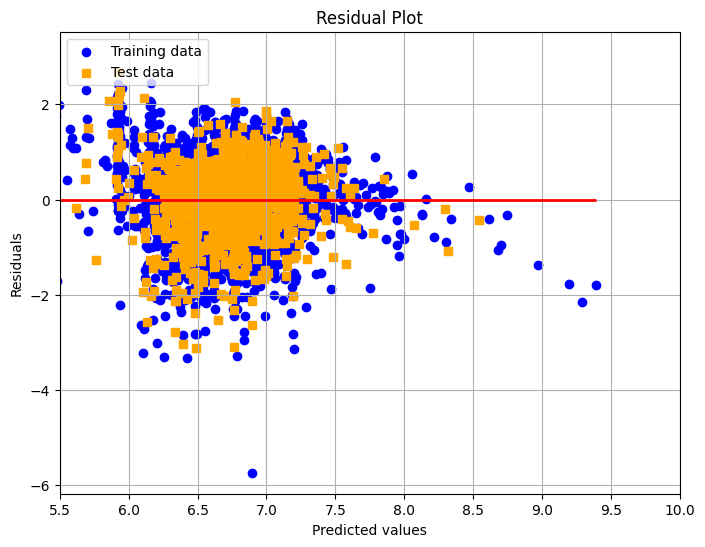

In [14]:


# Prepare data for modeling
X = popular_cleaned_data_num[['owned', 'yearpublished', 'minplayers', 'minage']]
y = popular_cleaned_data_num['rating_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
residuals = y_train - y_pred_train
_, p_value = stats.ttest_1samp(residuals, 0)

print("p-value:", p_value)
print(f"R² score on training data: {r2_train}")
print(f"R² score on test data: {r2_test}")
print(f"Mean Absolute Error on training data: {mae_train}")
print(f"Mean Absolute Error on test data: {mae_test}")
print(f"Mean Squared Error on training data: {mse_train}")
print(f"Mean Squared Error on test data: {mse_test}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

# Plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred_test, residuals_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_pred_train.min(), y_pred_test.min()), xmax=max(y_pred_train.max(), y_pred_test.max()), color='red', lw=2)
plt.title('Residual Plot')
plt.grid(True)
plt.xlim(5.5, 10)
plt.show()



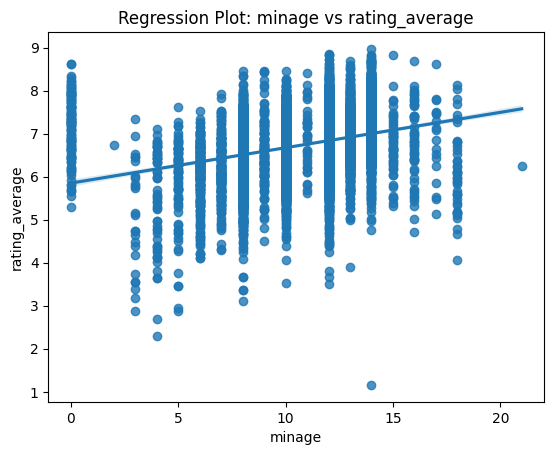

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a scatter plot with regression line
sns.regplot(x='minage', y='rating_average', data=popular_cleaned_data_num)

# Set plot title and labels
plt.title('Regression Plot: minage vs rating_average')
plt.xlabel('minage')
plt.ylabel('rating_average')

# Show the plot
plt.show()

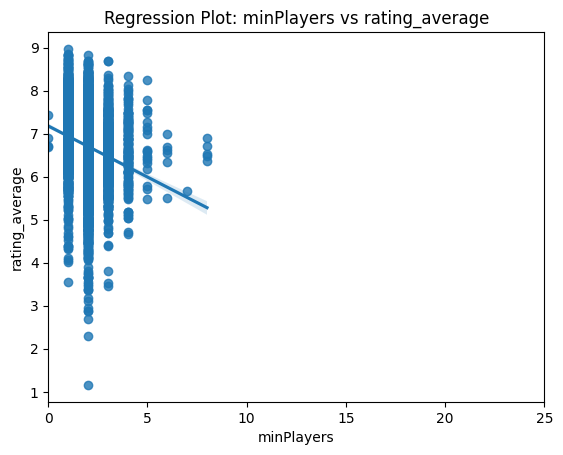

In [29]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a scatter plot with regression line
sns.regplot(x='minplayers', y='rating_average', data=popular_cleaned_data_num)

# Set plot title and labels
plt.title('Regression Plot: minPlayers vs rating_average')
plt.xlabel('minPlayers')
plt.ylabel('rating_average')
plt.xlim(0, 25)

# Show the plot
plt.show()



C:\Users\mariu\AppData\Local\Temp\ipykernel_5136\26873474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_cleaned_data_num['owned_log10'] = np.log10(popular_cleaned_data_num['owned'])


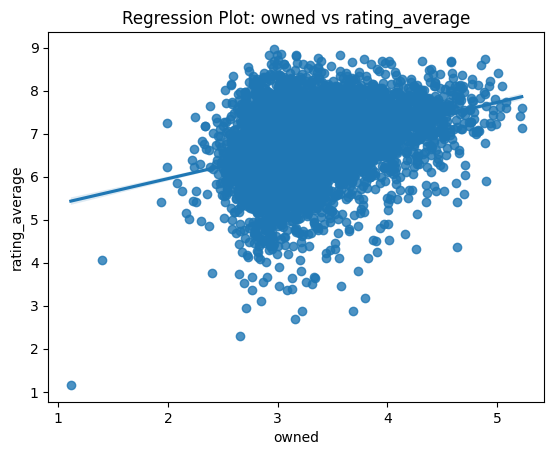

In [38]:
import seaborn as sns

import matplotlib.pyplot as plt

popular_cleaned_data_num['owned_log10'] = np.log10(popular_cleaned_data_num['owned'])


# Create a scatter plot with regression line
sns.regplot(x='owned_log10', y='rating_average', data=popular_cleaned_data_num)

# Set plot title and labels
plt.title('Regression Plot: owned log10 vs rating_average')
plt.xlabel('owned log10')
plt.ylabel('rating_average')

# Show the plot
plt.show()




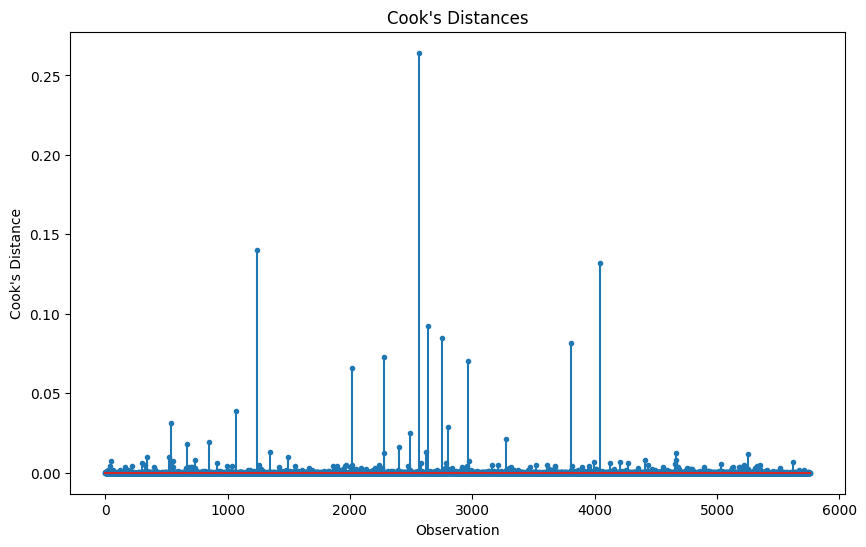

In [34]:

# Train a linear regression model using statsmodels
model_sm = sm.OLS(y_train, sm.add_constant(X_train))
model_sm_fit = model_sm.fit()

# Calculate Cook's distance values
influence = model_sm_fit.get_influence()
cooks_distance = influence.cooks_distance[0]

cooks_distance = cooks_distance.reshape(-1, 1)
cooks_distance_ids = np.concatenate((np.arange(len(cooks_distance)).reshape(-1, 1), cooks_distance), axis=1)
cooks_distance_ids = cooks_distance_ids[cooks_distance_ids[:, 1] > 1]
for row in cooks_distance_ids:
    print(f"ID: {int(row[0])}, Cook's Distance: {row[1]}")

# Plot Cook's distance values
import matplotlib.pyplot as plt

# Plot Cook's distances
plt.figure(figsize=(10, 6))
plt.stem(cooks_distance, markerfmt=".")
plt.xlabel("Observation")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distances")
plt.show()





## We conclude that there are no problems with Anomalous data 
### (only 2 out of N=7200 (popularity filtered) entries have Cooks distance > 1)

### TODO: Control for ``Year``, not in our control

In [42]:
popular_cleaned_data_num['yearpublished'].describe()

count    7200.000000
mean     1994.462222
std       187.625143
min     -3500.000000
25%      2004.000000
50%      2012.000000
75%      2017.000000
max      2022.000000
Name: yearpublished, dtype: float64

In [41]:
# Prepare data for modeling
X = popular_cleaned_data_num[['owned', 'minplayers', 'minage']]
y = popular_cleaned_data_num['rating_average']

# Add 'yearpublished' as a covariate
covariate = popular_cleaned_data_num['yearpublished']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
covariate_train, covariate_test = train_test_split(covariate, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model with 'yearpublished' as a covariate
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=covariate_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
residuals = y_train - y_pred_train
_, p_value = stats.ttest_1samp(residuals, 0)

print("p-value:", p_value)
print(f"R² score on training data: {r2_train}")
print(f"R² score on test data: {r2_test}")
print(f"Mean Absolute Error on training data: {mae_train}")
print(f"Mean Absolute Error on test data: {mae_test}")
print(f"Mean Squared Error on training data: {mse_train}")
print(f"Mean Squared Error on test data: {mse_test}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

# Plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred_test, residuals_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_pred_train.min(), y_pred_test.min()), xmax=max(y_pred_train.max(), y_pred_test.max()), color='red', lw=2)
plt.title('Residual Plot')
plt.grid(True)
plt.xlim(5.5, 10)
plt.show()


ValueError: Negative values in data passed to `sample_weight`

### TODO:  Control for ``Owned``, initially not in our control. In short: there is a reason the game is in demand and popular: something made it so. We want to see if there are other factors in play, so we will see what happens when we control for it.

### TODO: Show each IVs influence, while controling for others.